## Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

#### The prediction task is to determine whether a person makes over ($50K a year).

### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
 1.	A single cell estimate of the population 16+ for each state.
 1.	Controls for Hispanic Origin by age and sex.
 1.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
## import all basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Uploading dataset from below local drive path
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Flip lobo\Project Evaluation\Third Phase\census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Observations:
- Dataset has been uploaded from given path.
- Dataset contains 32560 rows and 15 columns (which includes 14 feature and 1 target (Income).
- Dataset divided into two datatypes as integer and object.

### Action plan:
- Will divide dataset further into datatypes of integer and object.

In [3]:
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26244,43,Federal-gov,134026,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Male,2174,0,40,United-States,<=50K
2407,45,Private,330535,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,3325,0,40,United-States,<=50K
9492,52,Private,190333,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
25969,31,Private,208881,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
26256,32,Private,168854,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,1848,50,United-States,>50K
27810,30,Private,115426,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
10510,33,Private,125856,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
27977,55,Private,197114,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,6,United-States,>50K
17741,21,Private,27049,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
22538,31,Private,156763,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,2829,0,40,United-States,<=50K


### Observations:
- With the help of .sample function, we could see the random rows of the dataset.
- It seems most of the values are of Private workclass, they are mostly Husband in relation and most of them are White race with native_country as United states. Most of them earnings are <=50K.
- Datatypes divided into integer and object.- 
- Also, can see multiple values are of 0 in columns (Capital_gain, Capital_loss)

### Action plan:
- Will confirm datatypes of the dataset with .info function.
- Also, will check the distribution of values in each column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Observations:
- No null values found.
- Colummns are divided into following data types:
   - int64: Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week
   - object: Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex,       Native_country, Income.
- Cosidering datatype of target variable (Income) as object, this problem is defined as Classification problem.

In [5]:
df.loc[df.duplicated() == True].shape[0]

24

### Observations:
- Can see 24 rows are duplicate in our dataset.

### Action:
- Will drop duplicate values.

In [6]:
df_updated = df.drop_duplicates()
print('Dataset after droping duplicate value: ', df_updated.shape)
print('Dataset before droping duplicate value: ', df.shape)

Dataset after droping duplicate value:  (32536, 15)
Dataset before droping duplicate value:  (32560, 15)


### Observations:
- Output shows updated dataset with removal of duplicate values contains 32536 rows and 15 columns

In [7]:
## let's copy updated dataset to original dataset.
df = df_updated.copy()

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Observations:
- Above stastistics tables includes only numerical columns.
- Its confirmed no null value founds in any of the numerical columns.
- High standard deviations can be seen in the following columns (Capital_gain and Capital_loss).
- Following parameters of stats (min, 25%, 50%, 75%) are showing as 0 for Captital_gain and loss columns, which seems to be outliers and right side skewness.
- max parameter of stats confirmed outliers for Capital_gain and Capital_loss.

### Action plan:
- Most of the outliers and skewness found in Capital_gain and Capital_loss, this seems to be having minimum 0 value for most of the enteries. Need to investigate the insight of 0 value.

In [9]:
for i in df:
    values_count = df[i].value_counts()
    total_count = df[i].shape[0]
    percentages = (values_count / total_count * 100).round(2)

    result_df = pd.concat([values_count, percentages], axis=1)
    result_df.columns = ['Counts', 'Percentage']

    print(f'Column: {i}')
    print(result_df)
    print('\n') 

Column: Age
    Counts  Percentage
36     898        2.76
31     888        2.73
34     886        2.72
23     876        2.69
33     875        2.69
..     ...         ...
83       6        0.02
88       3        0.01
85       3        0.01
86       1        0.00
87       1        0.00

[73 rows x 2 columns]


Column: Workclass
                   Counts  Percentage
 Private            22673       69.69
 Self-emp-not-inc    2540        7.81
 Local-gov           2093        6.43
 ?                   1836        5.64
 State-gov           1297        3.99
 Self-emp-inc        1116        3.43
 Federal-gov          960        2.95
 Without-pay           14        0.04
 Never-worked           7        0.02


Column: Fnlwgt
        Counts  Percentage
123011      13        0.04
164190      13        0.04
203488      13        0.04
121124      12        0.04
126675      12        0.04
...        ...         ...
158040       1        0.00
232784       1        0.00
325573       1        0.00
14

### Observations:
- It seems there is a trailing space in categorical columns.
- Age column: The age of an individual 
   - It showing high variations in ages (considering 73 rows), also we can't see all values of ages and their distribution due to screen limitation. Will try to check age variation individually and via plot as well further. However, basis above result it seems most of the ages are in range of 23 to 35 and less values are of ages in range of 83 to 88. Will gather more evidence to get more details behind this column.

- Workclass : The class of work to which an individual belongs.   
   - Its divided into 7 categories.
   - Could see highest contribution is from Private categories (i.e., of 69.69% of the dataset), compare to others work class. 
   - Also, it seems 1836 values are of unknown (which contribute of 5.64% of the dataset), as same presented as ?. We need to deal the same further.

- Fnlwgt: The weight assigned to the combination of features (an estimate of how many people belong to this set of combination). Features includes 1) A single cell estimate of the population 16+ for each state. 2) Controls for Hispanic Origin by age and sex. 3) Controls by Race, age and sex.
   - Could say high variation in numbers due to involved count of rows (21647) and can't see all values with their counts due to screen limitation. Howevever, it seems same values has been repeated multiple times in the dataset. Also, could see contribution of values are in range of 0.04 to 0.00%.

- Education: Detail of individual education.
   -  Its divided into 16 categories. Out of which HS-grad has highest contributions of 32.25% followed by others.
   - Basis available percentage amongst each category, it seems categories are normally distributed.

- Education_num: Number of years for which education was taken.
    - Its also divided into 16 categories presented in form of numbers. Out of which HS-grad has highest contributions of 32.25% followed by others.
    - Basis available percentage amongst each category, it seems categories are normally distributed.
    - However, considering same distrubution of counts followed by percentage, seems both columns    (Education  and Education_num), telling same story and one of them can be dropped further after more investigation.

- Marital_status: Marriage status of each individual of the dataset.
    - Its divided into 7 categories.
    - Out of which Married-civ-spouse contributed highest as 46.01% compare to others.
    - Also, basis distribution of data amongst categories, can say data is normally distributed.

- Occupation: Profession of an individual.
    - Its divided into 15 categories.
    - Out of which following profession (Prof-speciality, Craft-repair, Exec-managerial)    contributes more as approx 13%.
    - Could see 5.66% of profession are seems to be unknown, as same updated with ?. % of counts seems similar like we found in column (Workclass). Will check the relations between them and deal accordingly.

- Relationship: Relationship status of an individual.
    - Its divided into 6 categories.
    - Out of which most of them are husbands, which are around 40.53%. This may confirm the ratios of male and female, where males ratios are higher compare to female.
    
- Race: Origin background of an individual.
    - Its divided into 5 categories.
    - Out of which most of them are of White origin, which leads to 85.43%, compare to others.
    
- Sex : Provide gender of an individual.
    - Its divided into 2 categories (Male and Female).
    - Out of which most of them are Male (66.92%) and rest of them are female. However, same ratio was found in Relationship column.
    
- Capital_gain: Capital gained by an individual.
    - It seems widely distributed which includes 119 rows of counts.
    - Out of which 91.67% contains 0 value. We need to check the applicability of this 0 value.
    - This also leads to outliers and right side skewness. That we have checked in stats description above.
    
- Capital_loss: Capital loss by an individual.
    - It seems widely distributed which includes 92 rows of counts.
    - Out of which 95.33% contains 0 value. We need to check the applicability of this 0 value.
    - This also leads to outliers and right side skewness. That we have checked in stats description above, same as Capital_gain column.
    
- Hours per week : Provide working hours per week of an individual
    - Its seems widely distributed which leads to 94 rows of counts.
    - Out of which 40 hours/week contributes more as 46.73% compare to others.
    - It seems almost 50% of the people are working 40 hours in a week to earns a money.
    
- Native_country: Country to which individual belongs to.
    - Its include 42 countries data.
    - Out of which mostly data of US, i.e., 89.60%.
    - Could also see almost 2% of data are without country name, as same reflecting as ?.
    
- Income (Target variable) : Provide details of income of an individual.
    - Its includes 2 categories (<=50K and >50K).
    - Out of which people income are of <=50K, which is of 75.91% and rest of having income as >50 K.
    - Considering two class of the variable, this is binary classification problem.
    - Basis distribution of counts, we have to manage the imbalance of the class, in order to avoid further biasness of the model.
    
### Conclusion:
- As per above observations, it seems most of the data are from United States, in which many of them are high school (HS) graduates male and they are married with civilian spouse. Also, they are doing private jobs 40 hours per week with income of <=50K. Seems to be the same story which we have observed with above .sample function.

### Action plan:
- Need to deal with value ?.
- Need to check the importance of 0 value.
- Will remove trailing space

In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Observations:
- Exported all columns name

In [11]:
## removing trailing space from categorical columns.
cat = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
df[cat] = df[cat].apply(lambda x: x.str.strip())
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
for i in df: ### After removing trailing space from categorical columns
    values_count = df[i].value_counts()
    total_count = df[i].shape[0]
    percentages = (values_count / total_count * 100).round(2)

    result_df = pd.concat([values_count, percentages], axis=1)
    result_df.columns = ['Counts', 'Percentage']

    print(f'Column: {i}')
    print(result_df)
    print('\n') 

Column: Age
    Counts  Percentage
36     898        2.76
31     888        2.73
34     886        2.72
23     876        2.69
33     875        2.69
..     ...         ...
83       6        0.02
88       3        0.01
85       3        0.01
86       1        0.00
87       1        0.00

[73 rows x 2 columns]


Column: Workclass
                  Counts  Percentage
Private            22673       69.69
Self-emp-not-inc    2540        7.81
Local-gov           2093        6.43
?                   1836        5.64
State-gov           1297        3.99
Self-emp-inc        1116        3.43
Federal-gov          960        2.95
Without-pay           14        0.04
Never-worked           7        0.02


Column: Fnlwgt
        Counts  Percentage
123011      13        0.04
164190      13        0.04
203488      13        0.04
121124      12        0.04
126675      12        0.04
...        ...         ...
158040       1        0.00
232784       1        0.00
325573       1        0.00
140176      

### Observations:
- Output confirmed trailing space removed.

In [13]:
df1 = df.loc[df['Capital_gain']==0] ## filtering out dataset basis column (capital_gain)==0
for i in df1:
    values_count = df1[i].value_counts()
    total_count = df1[i].shape[0]
    percentages = (values_count / total_count * 100).round(2)

    result_df1 = pd.concat([values_count, percentages], axis=1)
    result_df1.columns = ['Counts', 'Percentage']

    print(f'Column: {i}')
    print(result_df1)
    print('\n')

Column: Age
    Counts  Percentage
23     855        2.87
31     830        2.78
34     819        2.75
33     818        2.74
28     815        2.73
..     ...         ...
83       5        0.02
88       3        0.01
85       3        0.01
86       1        0.00
87       1        0.00

[73 rows x 2 columns]


Column: Workclass
                  Counts  Percentage
Private            20941       70.21
Self-emp-not-inc    2279        7.64
Local-gov           1899        6.37
?                   1713        5.74
State-gov           1192        4.00
Self-emp-inc         916        3.07
Federal-gov          866        2.90
Without-pay           12        0.04
Never-worked           7        0.02


Column: Fnlwgt
        Counts  Percentage
126675      12        0.04
123011      12        0.04
113364      12        0.04
190290      11        0.04
123983      11        0.04
...        ...         ...
318082       1        0.00
158040       1        0.00
232784       1        0.00
325573      

### Observation:
- 1) After comparing the distribution of values of complete dataset, no specific pattern can be seen which can further justify the capital_gain == 0.
- 2) Also, would like to highlight 94.91% of capital_loss ==0 where capital_gain == 0 is 100%. However, it also make sense, in terms of no capital_gain leads to no capital_loss.

### Action plan:
- Let's check 0 of capital_loss

In [14]:
df2 = df.loc[df['Capital_loss']==0] ## filtering out dataset basis column (capital_loss)==0
for i in df2:
    values_count = df2[i].value_counts()
    total_count = df2[i].shape[0]
    percentages = (values_count / total_count * 100).round(2)

    result_df2 = pd.concat([values_count, percentages], axis=1)
    result_df2.columns = ['Counts', 'Percentage']

    print(f'Column: {i}')
    print(result_df2)
    print('\n')  

Column: Age
    Counts  Percentage
23     857        2.76
36     857        2.76
31     843        2.72
35     841        2.71
33     841        2.71
..     ...         ...
83       5        0.02
88       3        0.01
85       3        0.01
86       1        0.00
87       1        0.00

[73 rows x 2 columns]


Column: Workclass
                  Counts  Percentage
Private            21691       69.93
Self-emp-not-inc    2388        7.70
Local-gov           1966        6.34
?                   1778        5.73
State-gov           1239        3.99
Self-emp-inc        1032        3.33
Federal-gov          902        2.91
Without-pay           14        0.05
Never-worked           7        0.02


Column: Fnlwgt
        Counts  Percentage
203488      13        0.04
164190      12        0.04
121124      12        0.04
113364      12        0.04
148995      11        0.04
...        ...         ...
288103       1        0.00
358533       1        0.00
199816       1        0.00
98228       

### Observation:
- 1) After comparing the distribution of values of complete dataset, no specific pattern can be seen which can further justify the capital_loss == 0.
- 2) Also, would like to highlight 91.26% of capital_gain ==0 where capital_loss == 0 is 100%. However, it also make sense, in terms of no capital_gain leads to no capital_loss. However, another part of the story where rest of the capital_gain with values more than 0, which may not further leads to any capital_loss.


### Action plan:
- No specific pattern has been seen for 0 values in capital_gain and capital_loss, basis we have to check outliers and skewness and deal accordingly.

In [15]:
### Separate numerical and categorical data
num = []
cat = []

for i in df:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)
print('List of numerical columns: ', num)
print('\n List of categorical columns: ', cat) 

List of numerical columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

 List of categorical columns:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


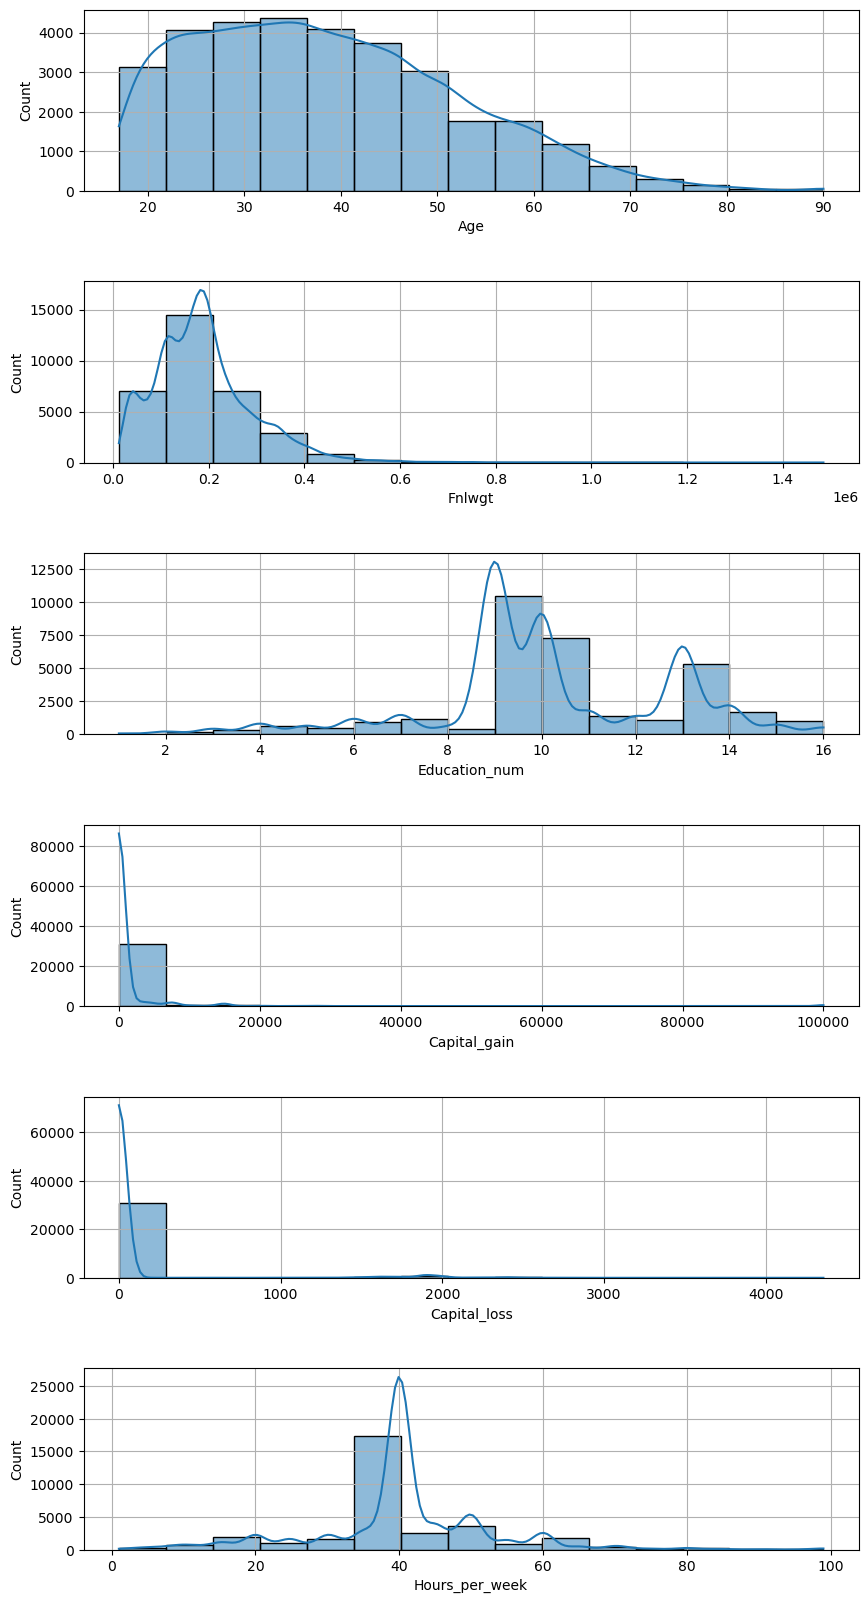

In [16]:
### Checking distribution of data for each Numerical columns:
plt.figure(figsize = (10, 20))
plotnumber = 1
for i in num:
    if plotnumber <=6:
        plt.subplot(6, 1, plotnumber)
        sns.histplot(df, x=i, kde = True, bins=15)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        plt.xlabel(i, fontsize = 10)
        plt.grid(axis='both')               
    plotnumber+=1  
plt.show()

### Observations on distribution of numerical columns:
- Age:
  - Can see righside skewness.
  - Data is widely distributed between ages from 15 to 90 years.
  - Most of the datapoints are seems to be between 20 to 50 years.

- Fnlwgt:
  - Rightside skewness is observed.
  - Data is widely distributed. Need to check outliers for the same.

- Education_num:
  - Seems to be both side skewed (right and left side). Will check the exact value further.
  - Data points dsitributed from 2.5 to 15.0

- Capital_gain and Capital_loss:
  - Both are right side skewed.
  - Data is widely distributed.
  - Most of the datapoints are of value 0, the same was observed in stats method as well.
  - Will check skewness values and outliers and accordingly it will be dealed.
  
### Action plan:
- Will check data distribution in categorical column.

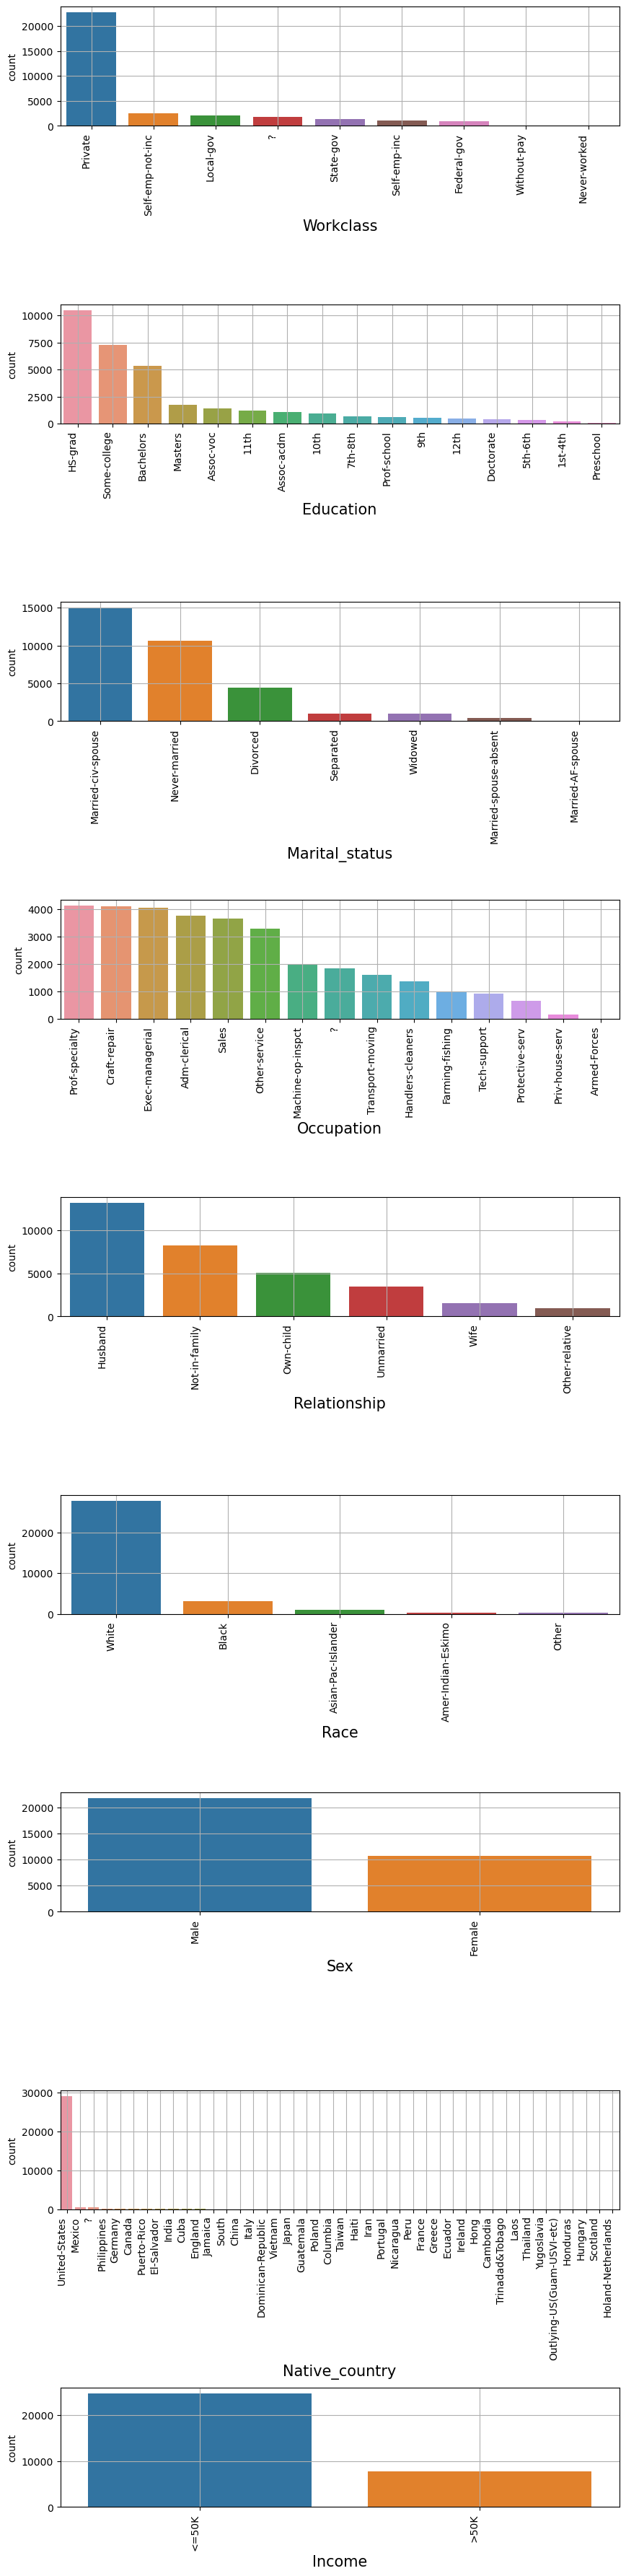

In [17]:
### Checking distribution of data for each Categorical columns:
plt.figure(figsize = (10, 45))
plotnumber = 1
for i in cat:
    if plotnumber <=9:
        plt.subplot(9, 1, plotnumber)
        ax= sns.countplot(x=i, data=df, order = df[i].value_counts().index)       
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
        plt.xlabel(i, fontsize = 15)
        plt.subplots_adjust(wspace=0.5, hspace=1.5)        
        plt.grid(axis='both')               
    plotnumber+=1  
plt.show()

### Observations on categorical columns:

- Workclass:
  - Most data points are from the "Private" workclass.
  - Fewer data points are present for categories like "Without-pay" and "Never-worked," which aligns with the problem statement.
  - Some data points are marked as "?" and might represent missing values.

- Education:
  - The majority of data points fall under the "HS-grad" category.
  - There are fewer data points for categories like "Pre-school," which is justifiable.

- Marital Status:
  - "Married-civ-spouse" has the highest frequency.
  - There are fewer data points for "Married-AF-Spouse."  

- Occupation:
  - The most common occupations include "Prof-specialty," "Craft-repair," and "Exec-managerial."
  - "Armed-forces" has very few data points, suggesting that the dataset mainly consists of civilians.
  - Some data points are marked as "?," indicating potential missing values.

- Relationship:
  - The majority of data points are labeled as "Husband."
  - "Other-relative" has fewer occurrences.

- Race:
  - The majority of individuals in the dataset are of the "White" race.

- Sex:
  - Most data points are labeled as "Male," followed by "Female."

- Native Country:
  - The majority of data points are from the United States.
  - Some data points are marked as "?," potentially indicating missing values.

- Income (Target Variable):
  - The distribution of income is asymmetric, with more data points in the "<=50K" category.
  - Addressing this asymmetry is important to prevent biasness in the model.
  
### Action plan:
- Handling missing values,
- Encoding categorical variables,
- Addressing class imbalance in the target variable.
- Dealing skewness and outliers

In [18]:
for i in num:
    df_feature = df.groupby(by=['Income'])[i].mean()
    print(f'List of features {i} :', '\n', df_feature, '\n')    

List of features Age : 
 Income
<=50K    36.787302
>50K     44.250925
Name: Age, dtype: float64 

List of features Fnlwgt : 
 Income
<=50K    190350.495364
>50K     188000.480674
Name: Fnlwgt, dtype: float64 

List of features Education_num : 
 Income
<=50K     9.595943
>50K     11.612195
Name: Education_num, dtype: float64 

List of features Capital_gain : 
 Income
<=50K     148.802972
>50K     4007.164562
Name: Capital_gain, dtype: float64 

List of features Capital_loss : 
 Income
<=50K     53.192412
>50K     195.051282
Name: Capital_loss, dtype: float64 

List of features Hours_per_week : 
 Income
<=50K    38.842815
>50K     45.473402
Name: Hours_per_week, dtype: float64 



### Observations basis mean values for various features grouped by the "Income" categories (<=50K and >50K)

- Age:
  - The average age for individuals with an income <=50K is approximately 36.78 years.
  - The average age for individuals with an income >50K is approximately 44.25 years.
  - This suggests that, on average, individuals with higher incomes tend to be older in age.
  - This make sense as more the age, more the experience which leads to more income.
  - Can see postive relation of income with age group.

- Fnlwgt:
  - The average final weight (Fnlwgt) for individuals with an income <=50K is approximately 190,350.49.
  - The average final weight for individuals with an income >50K is approximately 188,000.48.
  
- Education_num:
  - The average education level (as represented by the numerical encoding "Education_num") for individuals with an income <=50K is approximately 9.59.
  - The average education level for individuals with an income >50K is approximately 11.61.
  - Higher average education levels are associated with higher incomes. This make sense as well.
  - Can see postive relation of income with Education_num.

- Capital_gain:
  - The average capital gain for individuals with an income <=50K is approximately Dollar 148.80.
  - The average capital gain for individuals with an income >50K is significantly higher, approximately Dollar 4007.16. 
  - Higher average capital gains are associated with higher incomes. This make sense as well.
  - Can see positive relation here.

- Capital_loss:
  - The average capital loss for individuals with an income <=50K is approximately Dollar 53.19.
  - The average capital loss for individuals with an income >50K is higher, approximately Dollar 195.05.
  - Higher average capital losses are associated with higher incomes, though the impact seems less pronounced than with capital gains. Still can see the positive relation here as well.

- Hours_per_week:
  - The average number of hours worked per week for individuals with an income <=50K is approximately 38.84 hours.
  - The average number of hours worked per week for individuals with an income >50K is approximately 45.47 hours.
  - Individuals with higher incomes tend to work longer hours on average.
  - Showing positive relation.
  
- It seems all numerical columns showing positive relation with Income. Will recofirm with relationship plot as well. 

In [19]:
## Checking similarity between Education and Education_num features.
education_hierarchy_check = df.groupby(['Education', 'Education_num']).size().reset_index(name='count')
education_hierarchy_check.sort_values(by='Education_num', ascending=False)

,Education,Education_num,count
10,Doctorate,16,413
14,Prof-school,15,576
12,Masters,14,1722
9,Bachelors,13,5352
7,Assoc-acdm,12,1067
8,Assoc-voc,11,1382
15,Some-college,10,7282
11,HS-grad,9,10494
2,12th,8,433
1,11th,7,1175


### Observations:
- Above table shows both features (Education and Education_num) seems to be duplicate of each others basis having same counts of each category.
- Education_num is seems to be giving the hierarchy order to Education categories. For e.g., most highest education Doctorate having highest number as 16 followed by least education Preschool having lowest number as 1.
- However, as per datapoints it seems counts of HS-grad is more compare to others categories.
- Basis confirmation, we can drop education column in order to avoid our further encoding categorical column.

### Action plan:
- Dropping column Education

In [20]:
df_updated = df.drop('Education',axis=1)
df_updated

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Observations:
- After dropping duplicate column, our dataset updated with 32560 rows (no changes) and 14 columns.

In [21]:
### Separate numerical and categorical features after droping unwanted categorical feature 
num = []
cat_updated = []

for i in df_updated:
    if df_updated[i].dtypes=='object':
        cat_updated.append(i)
    else:
        num.append(i)
print('List of numerical columns: ', num)
print('\n List of categorical columns: ', cat_updated) 

List of numerical columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

 List of categorical columns:  ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


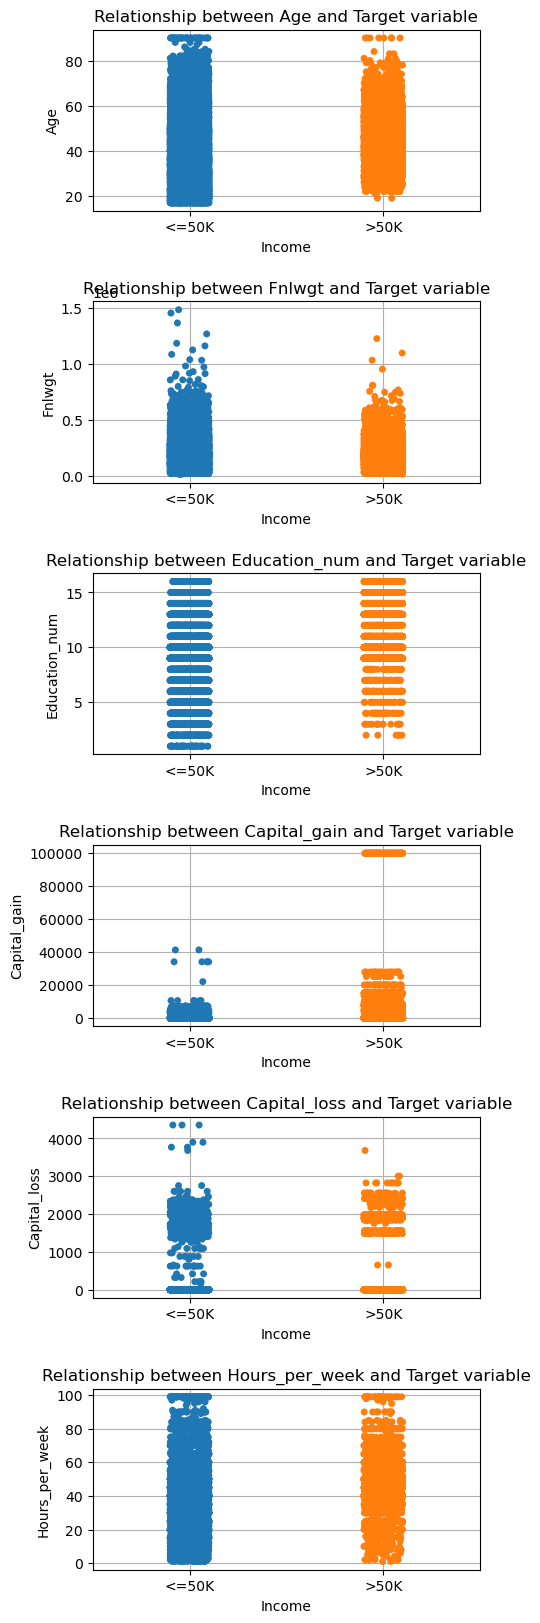

In [22]:
## Will Check relationship between Target variable with other Numerical features.
plt.figure(figsize =(5,20))
plotnumber = 1
for i in num:
    if plotnumber <=6:
        plt.subplot(6,1, plotnumber)
        sns.stripplot(x='Income', y=i, data=df_updated)
        plt.xlabel('Income', fontsize = 10)
        plt.ylabel(i, fontsize = 10)
        plt.grid(axis='both')
        plt.title(f'Relationship between {i} and Target variable', fontsize=12)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)        
    plotnumber+=1
plt.show()

### Observations of relationship between all numerical features and Income (target variable):
- Positive relation can be seen between all numerical features and target variable.
- Due to imbalance between income variables (<=50K and >50K), we can easily see the varaition in the plot.

### Action plan:
- Will check relationship between all categorical features and target variable.

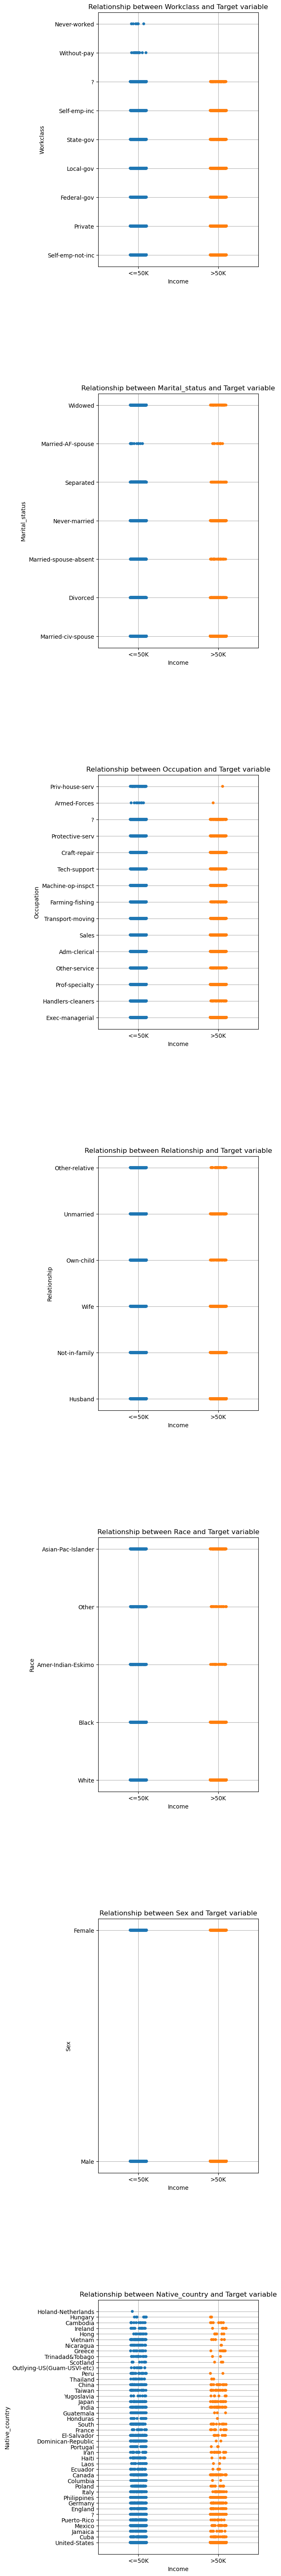

In [23]:
## Will Check relationship between Target variable with other Categorical features.
plt.figure(figsize =(5,80))
plotnumber = 1
for i in cat_updated:
    if plotnumber <=7:
        plt.subplot(7,1, plotnumber)
        sns.stripplot(x='Income', y=i, data=df_updated)
        plt.xlabel('Income', fontsize = 10)
        plt.ylabel(i, fontsize = 10)
        plt.grid(axis='both')
        plt.title(f'Relationship between {i} and Target variable', fontsize=12)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)        
    plotnumber+=1
plt.show()

### Observations betwen all categorical features and Income (Target variable):

- Workclass v/s Target variable:
	- Can see all categories are moving in parallel for both <=50K and >50K until ? (unknown categories). However, no > 50 K datapoints can be seen for categories as Without-pay and Never-worked, which make sense here.

- Marital_status v/s Target variable:
	- All categories are distributed between <=50K and >50K.

- Occupation v/s Target variable:
	- Can see all categories are moving in parallel for both <=50K and >50K until ? (unknown categories). However, datapoints of >50K seems to be decreased for the following categories (Armed-Forces and Priv-house-serv), which make sense considering the level of occupation. 

- Relationship v/s Target variable:
	- All categories are distributed between <=50K and >50K.

- Race v/s Target variable:
	- All categories are distributed between <=50K and >50K.

- Sex and Target variable:
	- All categories are distributed between <=50K and >50K.

- Native_country and Target variable:
	- For <=50K, could see datapoints of all countries, unlike to >50 K.
	- For >50K, could see significant changes in datapoints for some of the countries.

### Action plan:
- Being most of the nominal data, we may not able to see the exact relation with target variable, hence will gather more relation further.
- Will check and deal outliers and skewness

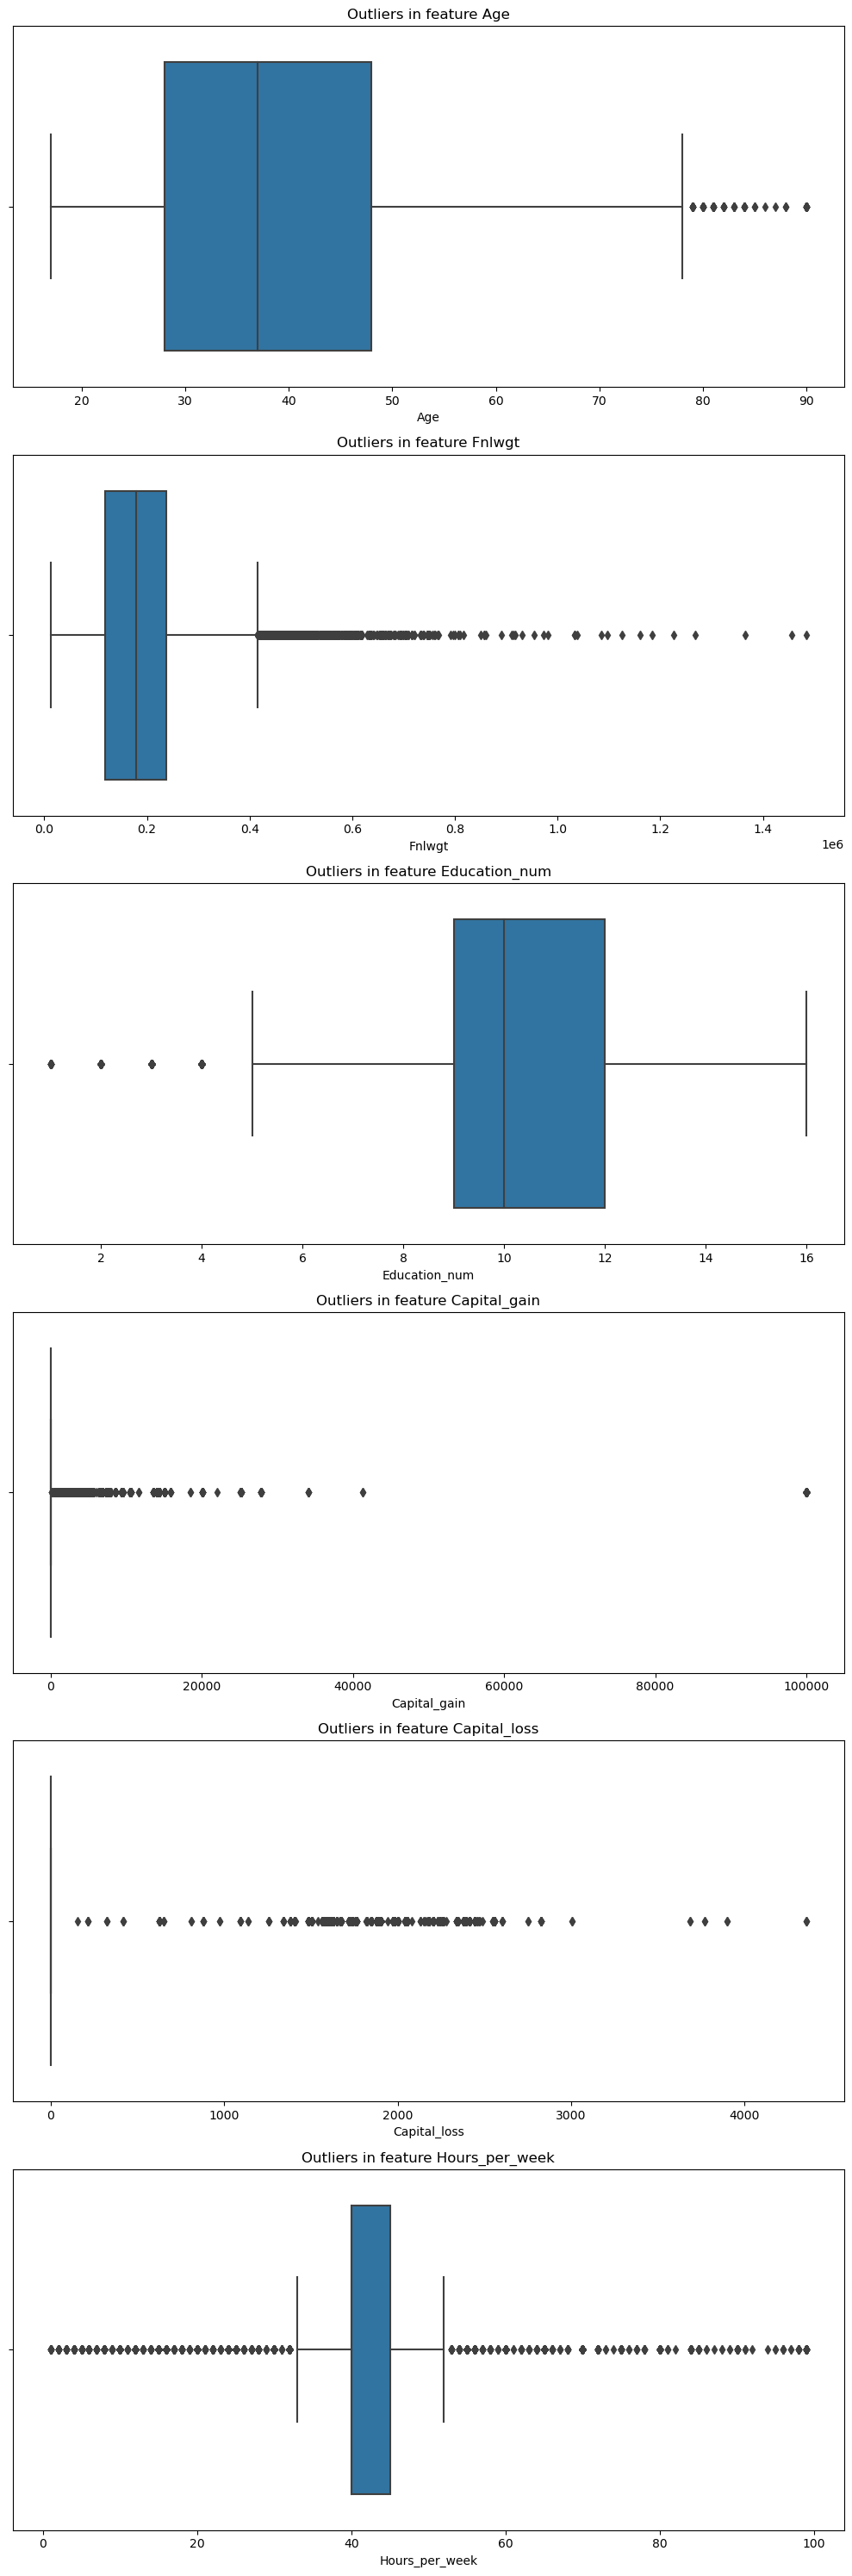

In [24]:
### Checking outliers in numerical columns:
plt.figure(figsize=(10, 30))
plotnumber = 1
for i in num:
    if plotnumber<=6:
        plt.subplot(6,1,plotnumber)
        sns.boxplot(x=df_updated[i], orient = 'v')
        plt.title(f'Outliers in feature {i}')        
    plotnumber+=1
plt.tight_layout()   

### Observations:
- Could see outliers in all numerical features.

### Action plan:
- Will deal with outliers
- Will check skewness and deal accordingly.

In [25]:
## removing outliers with z score
from scipy.stats import zscore
z = np.abs(zscore(df_updated[num]))
np.where(z>3)
df3 = df_updated[(z<3).all(axis=1)]
old_data = df_updated.shape[0]
new_data = df3.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)
print('\n', df3)

Old data = 32536
New data =  29808
Loss data in percentage =  8.384558642734202

        Age         Workclass  Fnlwgt  Education_num      Marital_status  \
0       50  Self-emp-not-inc   83311             13  Married-civ-spouse   
1       38           Private  215646              9            Divorced   
2       53           Private  234721              7  Married-civ-spouse   
3       28           Private  338409             13  Married-civ-spouse   
4       37           Private  284582             14  Married-civ-spouse   
...    ...               ...     ...            ...                 ...   
32555   27           Private  257302             12  Married-civ-spouse   
32556   40           Private  154374              9  Married-civ-spouse   
32557   58           Private  151910              9             Widowed   
32558   22           Private  201490              9       Never-married   
32559   52      Self-emp-inc  287927              9  Married-civ-spouse   

              Occ

### Observations:
- The data loss after applying z-score to remove outliers from numerical columns is 8.38%, which falls within an acceptable range. This loss is expected, especially when dealing with features like capital_gain and capital_loss, where a significant portion of the data is concentrated around 0.
- The final dataset has been updated to 29808 rows, indicating a reduction from the original 32536 rows. Additionally, the dataset now comprises 14 columns.

### Action plan:
- To ensure the integrity of the dataset, it's crucial to reassess the distribution of values in each numerical column. This will help confirm that the z-score-based outlier removal did not significantly distort the original distribution.
- Plotting boxplots for numerical columns will provide a visual confirmation of the absence of outliers. This step is essential to validate our conclusion that the z-score method effectively handled the outliers.

In [26]:
for i in df3: ## Checking distribution of values for each column after removing outliers
    values_count = df3[i].value_counts()
    total_count = df3[i].shape[0]
    percentages = (values_count / total_count * 100).round(2)

    result_df = pd.concat([values_count, percentages], axis=1)
    result_df.columns = ['Counts', 'Percentage']

    print(f'Column: {i}')
    print(result_df)
    print('\n') 

Column: Age
    Counts  Percentage
23     832        2.79
36     820        2.75
35     817        2.74
28     811        2.72
31     809        2.71
..     ...         ...
74      40        0.13
75      38        0.13
77      28        0.09
79      21        0.07
78      18        0.06

[63 rows x 2 columns]


Column: Workclass
                  Counts  Percentage
Private            20967       70.34
Self-emp-not-inc    2212        7.42
Local-gov           1915        6.42
?                   1654        5.55
State-gov           1216        4.08
Self-emp-inc         938        3.15
Federal-gov          885        2.97
Without-pay           14        0.05
Never-worked           7        0.02


Column: Fnlwgt
        Counts  Percentage
203488      13        0.04
121124      12        0.04
113364      12        0.04
164190      12        0.04
123011      11        0.04
...        ...         ...
63685        1        0.00
145439       1        0.00
255161       1        0.00
318082      

### Observations after removing outliers:
- Age:
  - The distribution is slightly more concentrated, with a peak at 23 years, earlier distribution of ages was spread across various values, with a peak at 36 years.

- Workclass:
  - The pattern in work classes remains similar, with a slight decrease in counts for each class. This is possible due to data loss of 8.38%.
  
- Fnlwgt:
  - The distribution remains similar, but the number of unique values has reduced. This is possible due to data loss of 8.38%.
  
- Education_num:
  - No significant change is observed, and the distributions remain consistent.
  
- Marital Status:
  - The pattern remains, with a decrease in counts for each category. This is possible due to data loss of 8.38%.
  
- Occupation:
  - The pattern in occupations remains similar, with a slight decrease in counts for each category. This is possible due to data loss of 8.38%.
  
- Relationship:
  - The distribution remains similar, with a decrease in counts for each category. This is possible due to data loss of 8.38%.
  
- Race:
  - No significant change is observed, and the distributions remain consistent.
  
- Sex:
  - No significant change is observed, and the distributions remain consistent.
  
- Capital_gain and Capital_loss:
  - The distribution remains similar, with a decrease in counts for non-zero values. This could be possible due to data loss of 8.38%.
  
- Hours_per_week:
  - The pattern remains, with a decrease in counts for other values. This is possible due to data loss of 8.38%.
  
- Native_country:
  - The pattern remains, with a decrease in counts for each country. This is possible due to data loss of 8.38%.
  
- Income (Target variable):
  - No significant change is observed, and the distributions remain consistent.
  
### Conclusion:
- The overall patterns and distributions in the columns remain similar, indicating that the removal of outliers did not significantly distort the original structure of the data.

### Action:
- Will afirm my conclusion with plotting boxplot.
- Will also check skewness too.

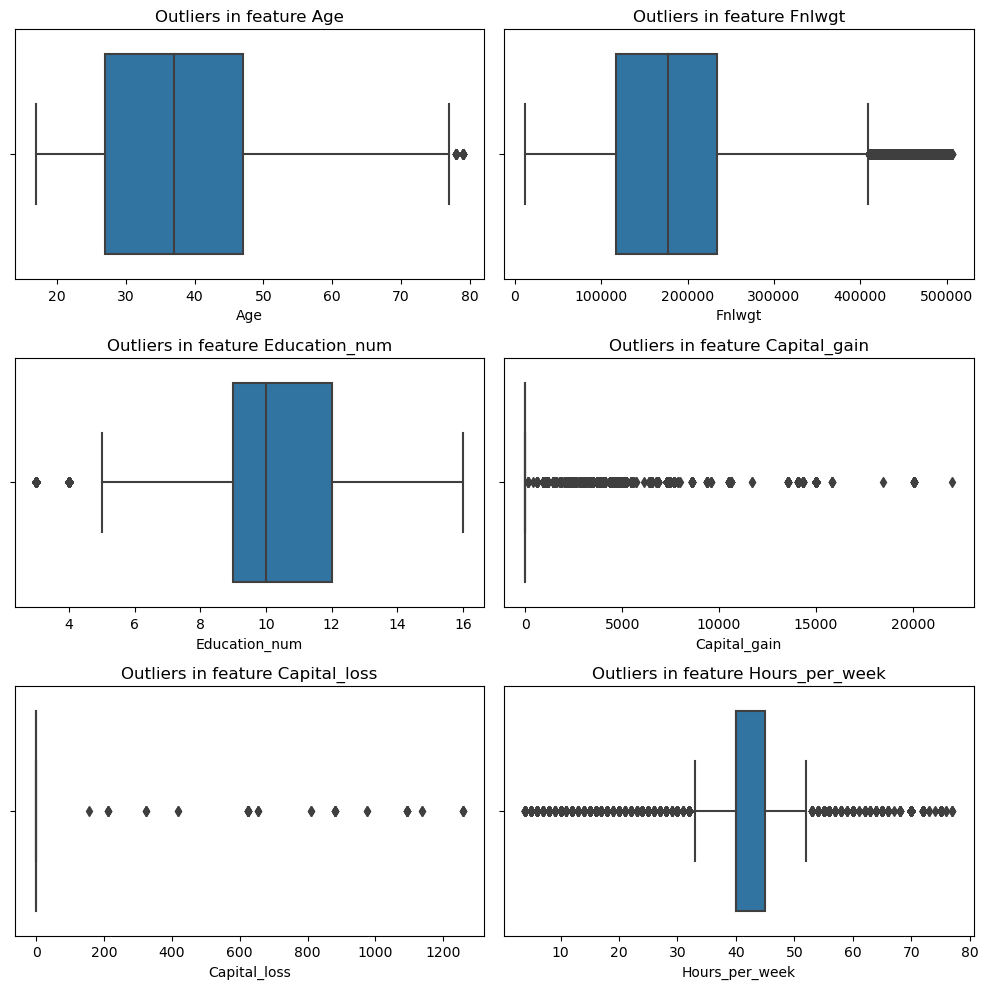

In [27]:
### Checking outliers in numerical columns after removing outliers:
plt.figure(figsize=(10, 10))
plotnumber = 1
for i in num:
    if plotnumber<=6:
        plt.subplot(3,2,plotnumber)
        sns.boxplot(x=df3[i], orient = 'v')
        plt.title(f'Outliers in feature {i}')        
    plotnumber+=1
plt.tight_layout() 

### Observations:
- Could see improvement in boxplot after removing outliers in each features.

### Action plan:
- Will now check skewness and deal accordingly which could also help to improve outliers further.

In [28]:
df_updated = df3.copy() ### Copying dataset after removing outliers into original dataset.
df_updated.shape

(29808, 14)

### Observations:
- Output confirmed the complete copying of the dataset (after removing outliers) into original dataset.

### Action plan:
- Will reassess the skewness of the dataset.

In [29]:
df_updated.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

### Observations:
- Output showing skewness of numerical columns.
- Basis, which following columns (Age, Fnlwgt, Capital_gain, Capital_loss) having right skewness. However, out of which capital_gain and capital_loss having significant right side skewness and that is due to most of the values reside at the end of 0.

### Action plan:
- In order to make normal distribution, we will deal with all above hghlighted skewness with PowerTransformer (Yeo-Johnson), as it can deal with all type of values (include 0).

In [30]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df_updated[['Age','Fnlwgt', 'Capital_gain', 'Capital_loss']] = scaler.fit_transform(df_updated[['Age','Fnlwgt', 'Capital_gain', 'Capital_loss']]+0.5)
df_updated.skew()

Age              -0.015923
Fnlwgt           -0.034772
Education_num    -0.169811
Capital_gain      3.072803
Capital_loss      0.000000
Hours_per_week   -0.353124
dtype: float64

### Observations after handling skewness:
- Could see most of the columns skewness has been settled in range, except Capital_gain.

### Action plan:
- Will try to gather more evidence to solidify my conclusion with the help of histplot.

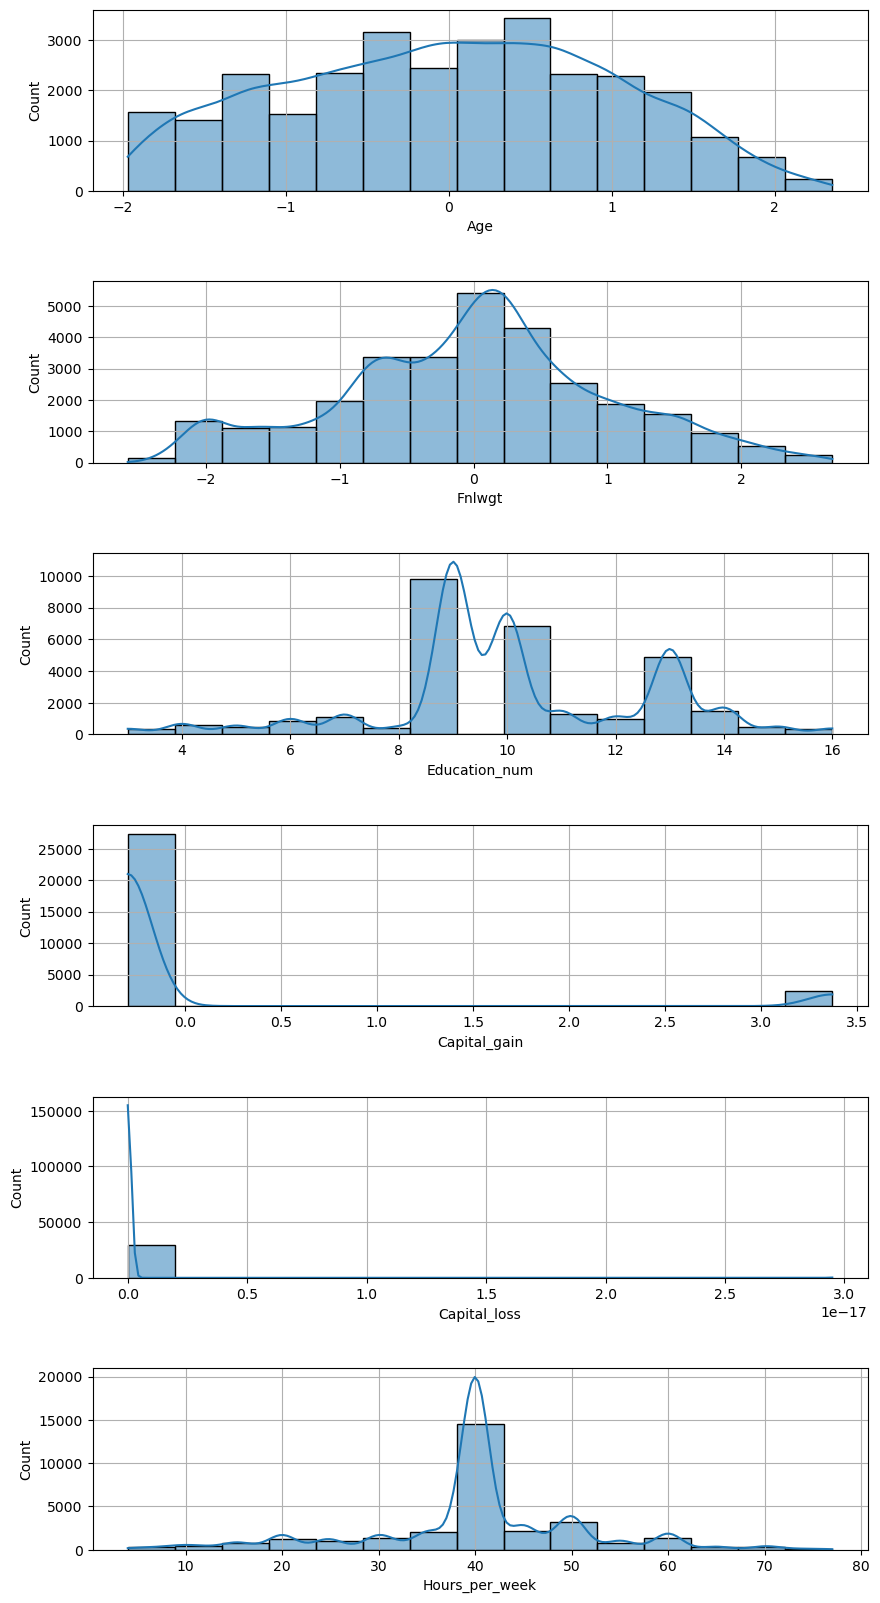

In [31]:
### Checking distribution of data for each Numerical columns after handling skewness:
plt.figure(figsize = (10, 20))
plotnumber = 1
for i in num:
    if plotnumber <=6:
        plt.subplot(6, 1, plotnumber)
        sns.histplot(df_updated, x=i, kde = True, bins=15)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        plt.xlabel(i, fontsize = 10)
        plt.grid(axis='both')               
    plotnumber+=1  
plt.show()

### Observations after handling skewness:
- Could see improvement in distribution shape of each columns.
- However, could see almost normal distribution in following columns (Age and Fnlwgt).

### Conclusion:
- The dataset has undergone significant cleaning through the removal of outliers and handling of skewness.
- It's acknowledged that complete removal of skewness and outliers may not be feasible or desirable due to specific characteristics in the data:
  - Education_num reflects the number of years of education, and some level of skewness might be inherent.
  - Most data points for capital_gain and capital_loss are concentrated around 0, reflecting the nature of these features.
  - High variation in hours_per_week may be realistic and not necessarily indicative of outliers.
  
### Action plan:
- Will work on encoding categorical columns.
- Basis assumption all categorical columns as nominal data, will apply binary encoder.
- Except Target variable (<=50K and >50K) and Sex feature (Male and Female), where we will apply replace method.

In [32]:
df_updated['Sex'] = df_updated['Sex'].replace({'Male':0, 'Female':1})
df_updated['Income'] = df_updated['Income'].replace({'<=50K': 0, '>50K':1})
df_updated

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.928483,Self-emp-not-inc,-1.114017,13,Married-civ-spouse,Exec-managerial,Husband,White,0,-0.296786,0.0,13,United-States,0
1,0.129823,Private,0.425182,9,Divorced,Handlers-cleaners,Not-in-family,White,0,-0.296786,0.0,40,United-States,0
2,1.103510,Private,0.605060,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,-0.296786,0.0,40,United-States,0
3,-0.709583,Private,1.484239,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,-0.296786,0.0,40,Cuba,0
4,0.054458,Private,1.046089,14,Married-civ-spouse,Exec-managerial,Wife,White,1,-0.296786,0.0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.806109,Private,0.809600,12,Married-civ-spouse,Tech-support,Wife,White,1,-0.296786,0.0,38,United-States,0
32556,0.275892,Private,-0.208509,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,-0.296786,0.0,40,United-States,1
32557,1.378101,Private,-0.236199,9,Widowed,Adm-clerical,Unmarried,White,1,-0.296786,0.0,40,United-States,0
32558,-1.336042,Private,0.286958,9,Never-married,Adm-clerical,Own-child,White,0,-0.296786,0.0,20,United-States,0


### Observations:
- After encoding target variable and Sex feature with .replace method, given output as follows:
  - Sex:
    - 0 denotes Male
    - 1 denotes Females
  - Income (Target variable):
    - 0 denotes <=50K
    - 1 denoted >50K
    
### Action plan:
- Will deal other categorical features with BinaryEncoder.

In [33]:
from category_encoders import BinaryEncoder ### importing BinaryEncoder library

In [34]:
enc = BinaryEncoder()
df_updated_2 = enc.fit_transform(df_updated[['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Native_country']])
df_updated_2

,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Marital_status_0,Marital_status_1,Marital_status_2,Occupation_0,Occupation_1,Occupation_2,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
32556,0,0,1,0,0,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
32557,0,0,1,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
32558,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### Observations:
- The binary encoder has been applied to the categorical columns, creating additional binary-encoded columns for each unique category in the original categorical columns.
- The resulting dataset shows no change in the number of rows, which remains at 29,808. This indicates that the transformation did not add or remove any data points.

### Action plan:
- Next step to get full dataset: Concatenating both the original dataset and the dataset after applying the binary encoder. This will result in a complete dataset with updated numerical representations for the categorical data.

In [35]:
conc = [df_updated, df_updated_2]
df_concat = pd.concat(conc, axis=1)
df_concat

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.928483,Self-emp-not-inc,-1.114017,13,Married-civ-spouse,Exec-managerial,Husband,White,0,-0.296786,...,1,0,0,1,0,0,0,0,0,1
1,0.129823,Private,0.425182,9,Divorced,Handlers-cleaners,Not-in-family,White,0,-0.296786,...,0,0,0,1,0,0,0,0,0,1
2,1.103510,Private,0.605060,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,-0.296786,...,1,0,1,0,0,0,0,0,0,1
3,-0.709583,Private,1.484239,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,-0.296786,...,1,0,1,0,0,0,0,0,1,0
4,0.054458,Private,1.046089,14,Married-civ-spouse,Exec-managerial,Wife,White,1,-0.296786,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.806109,Private,0.809600,12,Married-civ-spouse,Tech-support,Wife,White,1,-0.296786,...,1,0,0,1,0,0,0,0,0,1
32556,0.275892,Private,-0.208509,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,-0.296786,...,1,0,0,1,0,0,0,0,0,1
32557,1.378101,Private,-0.236199,9,Widowed,Adm-clerical,Unmarried,White,1,-0.296786,...,1,0,0,1,0,0,0,0,0,1
32558,-1.336042,Private,0.286958,9,Never-married,Adm-clerical,Own-child,White,0,-0.296786,...,0,0,0,1,0,0,0,0,0,1


### Observations:
- The binary encoder has successfully converted all categorical data into numerical representations.
- Examination of the resulting dataset has revealed the presence of duplicate columns, likely stemming from the binary encoding process.
- The dataset currently consists of 29,808 rows and 37 columns, including the duplicate columns.

### Action  plan:
- The removal of duplicate columns will result in a streamlined dataset without unnecessary redundancy.

In [36]:
df_concat_1 = df_concat.drop(df[['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Native_country']], axis=1)
df_concat_1

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_0,Workclass_1,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.928483,-1.114017,13,0,-0.296786,0.0,13,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0.129823,0.425182,9,0,-0.296786,0.0,40,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.103510,0.605060,7,0,-0.296786,0.0,40,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,-0.709583,1.484239,13,1,-0.296786,0.0,40,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0.054458,1.046089,14,1,-0.296786,0.0,40,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.806109,0.809600,12,1,-0.296786,0.0,38,0,0,0,...,1,0,0,1,0,0,0,0,0,1
32556,0.275892,-0.208509,9,0,-0.296786,0.0,40,1,0,0,...,1,0,0,1,0,0,0,0,0,1
32557,1.378101,-0.236199,9,1,-0.296786,0.0,40,0,0,0,...,1,0,0,1,0,0,0,0,0,1
32558,-1.336042,0.286958,9,0,-0.296786,0.0,20,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Observations:
- Upon reevaluation, there are no duplicate columns present in the dataset.
- The current dataset retains its original shape with 29,808 rows and now comprises 31 columns, reflecting the successful elimination of redundant features.

### Action plan:
- Let's reconfirm duplicate columns by importing all columns.
- Also, will reconfirm the datatype of each column.

In [37]:
df_concat_1.columns ### Importing all columns in list

Index(['Age', 'Fnlwgt', 'Education_num', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Income', 'Workclass_0', 'Workclass_1', 'Workclass_2',
       'Workclass_3', 'Marital_status_0', 'Marital_status_1',
       'Marital_status_2', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Relationship_0', 'Relationship_1', 'Relationship_2',
       'Race_0', 'Race_1', 'Race_2', 'Native_country_0', 'Native_country_1',
       'Native_country_2', 'Native_country_3', 'Native_country_4',
       'Native_country_5'],
      dtype='object')

### Observations:
- Output confirmed no duplicate columns.

In [38]:
df_updated = df_concat_1.copy() ### Copying updated dataset into original dataset.
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29808 entries, 0 to 32559
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               29808 non-null  float64
 1   Fnlwgt            29808 non-null  float64
 2   Education_num     29808 non-null  int64  
 3   Sex               29808 non-null  int64  
 4   Capital_gain      29808 non-null  float64
 5   Capital_loss      29808 non-null  float64
 6   Hours_per_week    29808 non-null  int64  
 7   Income            29808 non-null  int64  
 8   Workclass_0       29808 non-null  int64  
 9   Workclass_1       29808 non-null  int64  
 10  Workclass_2       29808 non-null  int64  
 11  Workclass_3       29808 non-null  int64  
 12  Marital_status_0  29808 non-null  int64  
 13  Marital_status_1  29808 non-null  int64  
 14  Marital_status_2  29808 non-null  int64  
 15  Occupation_0      29808 non-null  int64  
 16  Occupation_1      29808 non-null  int64 

### Observations:
- Output showing all columns converted into numerical data.
- Following columns (Age, Fnlwgt, Capital_gain, Capital_loss) are float datatype and rest all columns are of integer datatype (after applying encoding method).

### Action plan:
- Will check the multicollinearity between features with heatmap.

<AxesSubplot:>

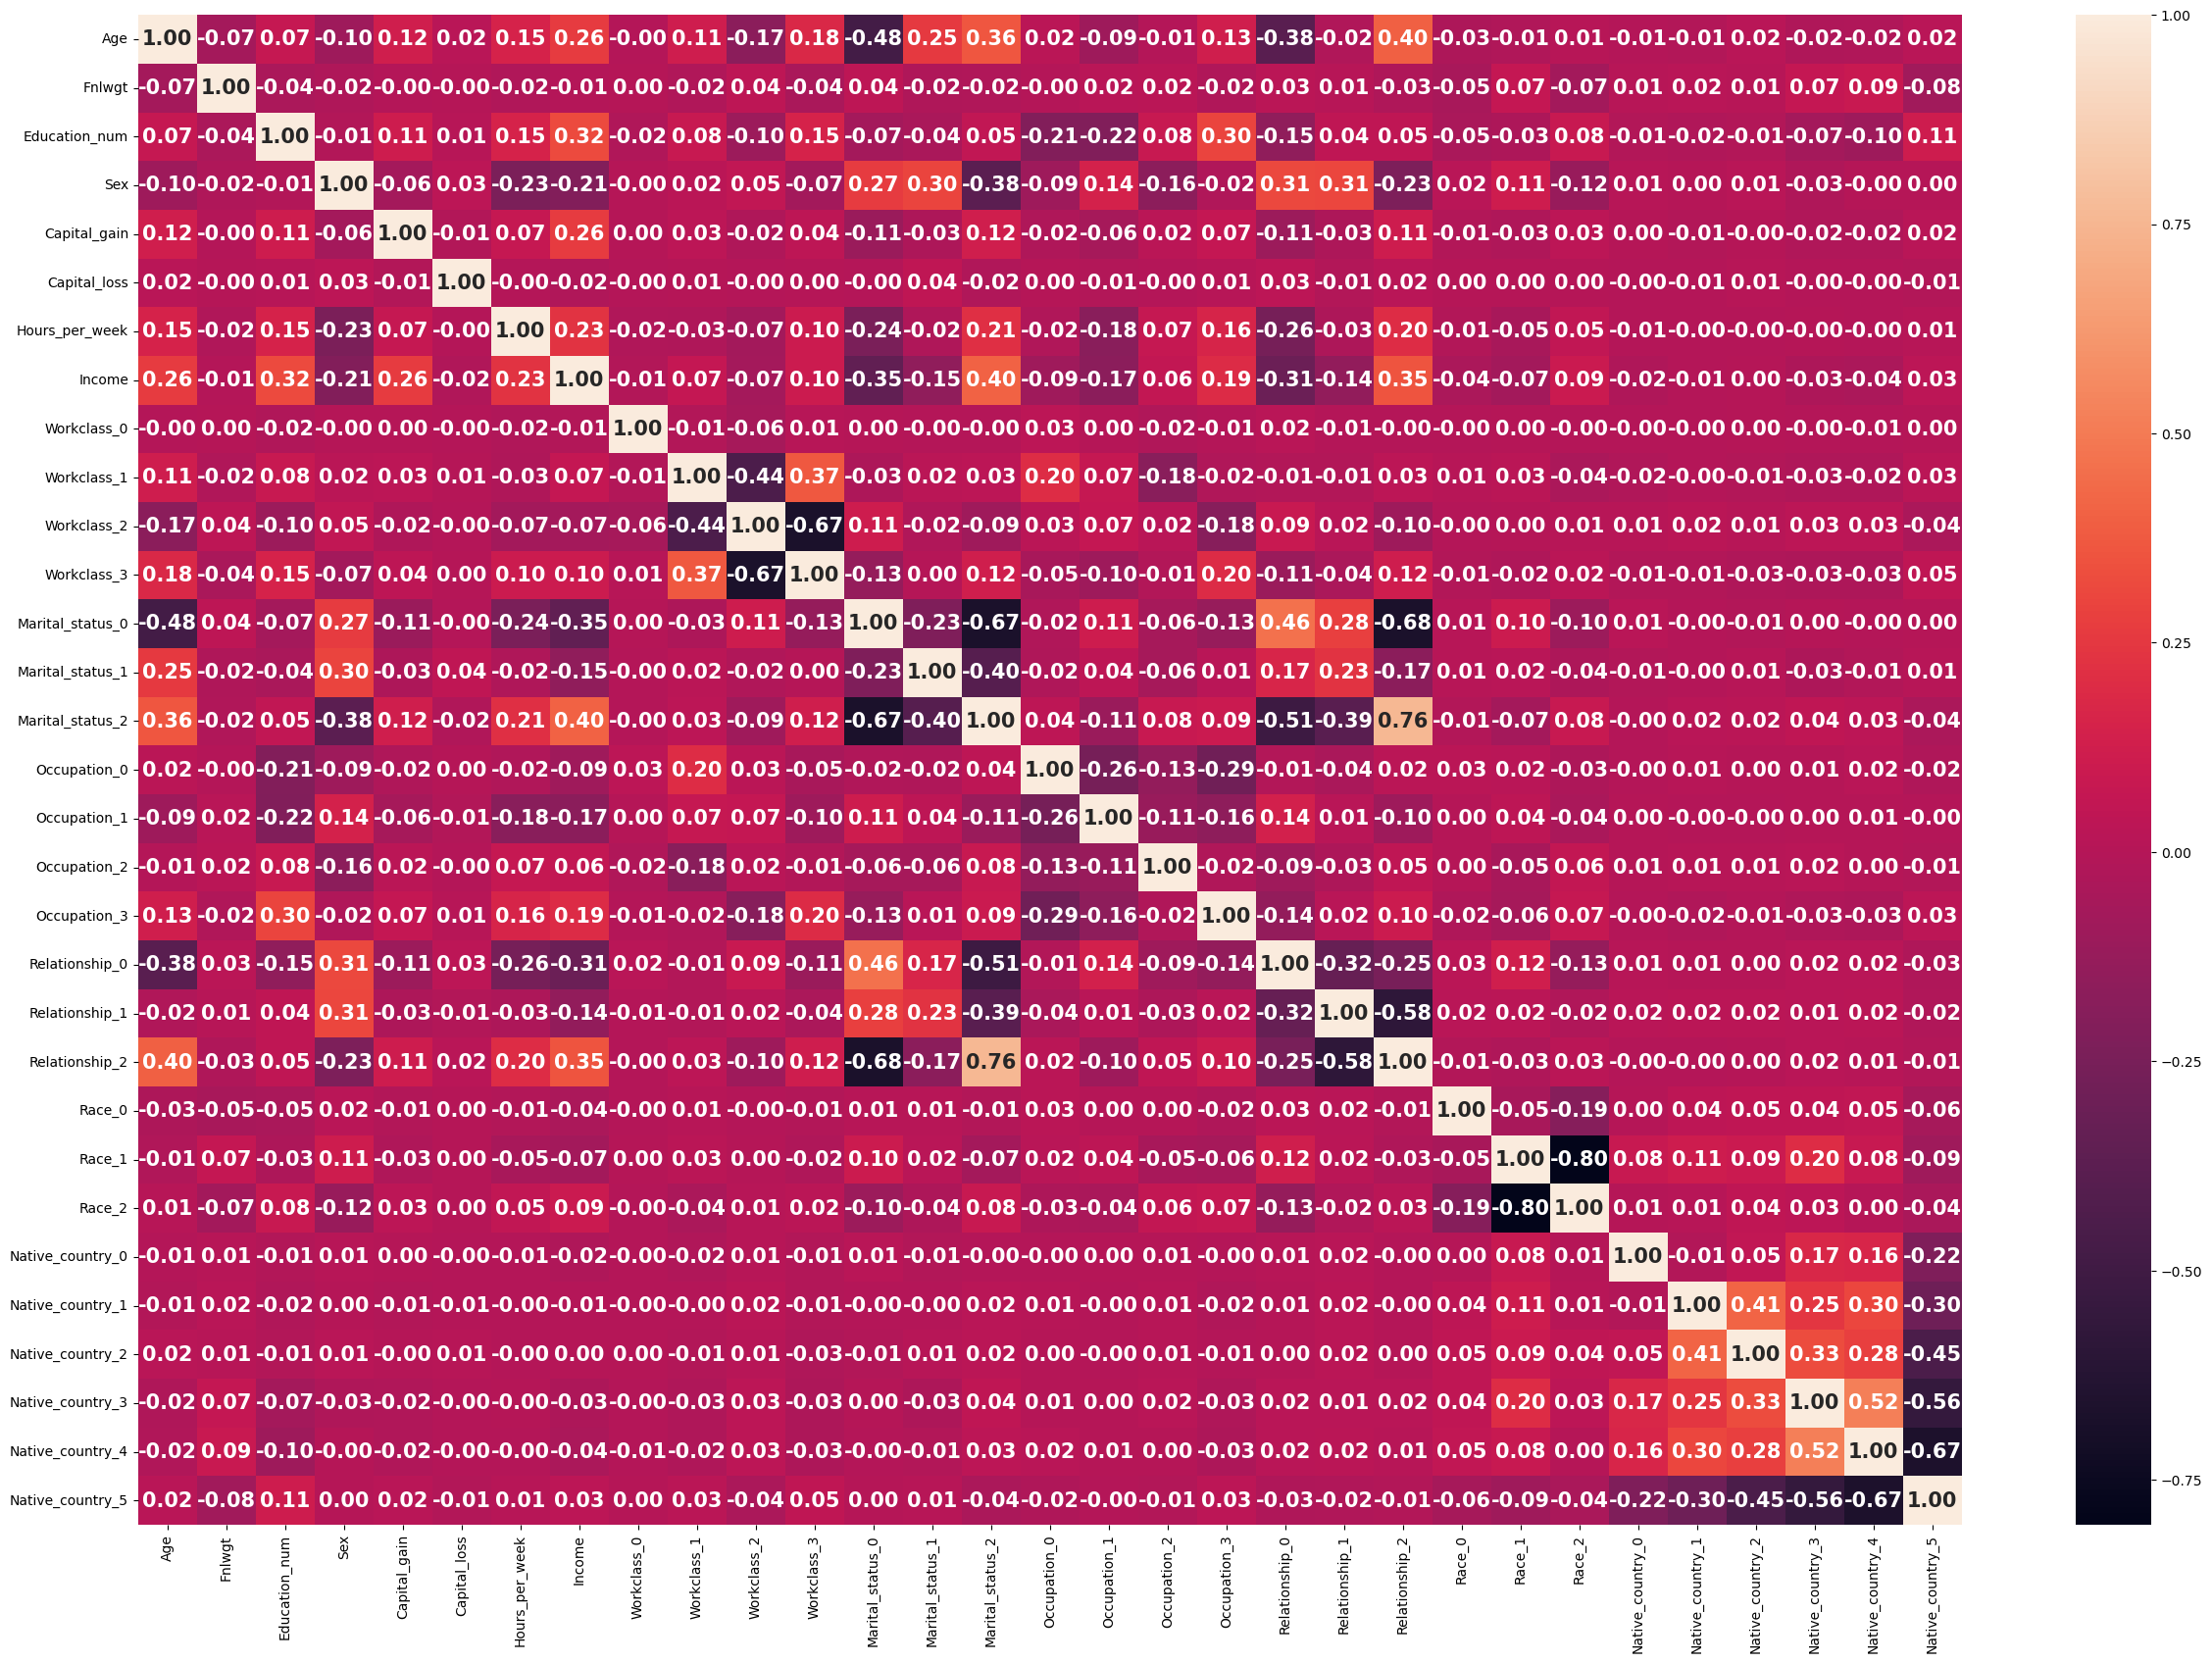

In [39]:
plt.figure(figsize=(30, 20))
core1 = df_updated.corr() ## created new dataset for .corr method
sns.heatmap(core1, annot=True, annot_kws={'fontsize': 15, 'weight': 'bold'}, fmt='.2f')

### Observations:

#### Target Variable vs. Features:
- Positive relationship with: 
  - Marital status 2 (40%)
  - Relationship 2 (35%)
- Negative relationship with:
  - Marital status 0 (35%)
- No strong relationship observed among them.

#### Features vs. Features:
- Positive Relationships:
  - Marital status 2 vs. Relationship 2 (76%) – strong multi-correlation
  - Native country 3 vs. Native country 4 (52%)
  - Marital status 0 vs. Relationship 0 (46%)
  - Native country 1 vs. Native country 2 (41%) 
  - Age vs. Relationship 2 (40%) and Age vs. Marital status 2 (36%).
  
- Negative Relationships:
  - Race 1 vs. Race 2 (80%) – strong multi-correlation
  - Marital status 0 vs. Relationship 2 (68%)
  - Workclass 3 vs. Workclass 2, Native country 4 and Native country 5, and Marital status 0 vs. Marital Status 2 (67%)
  - Relationship 1 vs. Relationship 2 (58%)
  - Native country 3 and Native country 5 (56%)
  - Marital status 2 vs. Relationship 0 (51%)
  - Age vs. Marital status 0 (48%)
  - Native country 2 vs. Native country 5 (45%)
  - Workclass 2 vs. Workclass 1 (44%)
  - Marital status 2 vs. Marital status 1 (40%)
  
### Conclusions:
- No strong relationship identified between the target variable and features.
- However, there is a +ve strong multi-correlation between Marital status 2 and Relationship 2 (76%) compared to other features.
- Additionally, there is a -ve strong multi-correlation between Race 1 and Race 2 (80%).

### Action plan:
- Utilize Variance Inflation Factor (VIF) for feature selection after standardization of the features.
- Address potential multicollinearity by considering the VIF values and selecting features accordingly.

In [40]:
### Separating features and target variable for further standarization and feature selection.
x = df_updated.drop('Income', axis=1)
y = df_updated['Income']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)
x

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.928483,-1.114017,1.191227,-0.716254,-0.296786,-0.040161,-2.415235,-0.026552,-0.469935,-2.218673,...,0.901314,-0.136087,-0.382876,0.344603,-0.089715,-0.151058,-0.197037,-0.268757,-0.228816,0.242923
1,0.129823,0.425182,-0.439623,-0.716254,-0.296786,-0.040161,0.009070,-0.026552,-0.469935,0.450720,...,-1.109491,-0.136087,-0.382876,0.344603,-0.089715,-0.151058,-0.197037,-0.268757,-0.228816,0.242923
2,1.103510,0.605060,-1.255048,-0.716254,-0.296786,-0.040161,0.009070,-0.026552,-0.469935,0.450720,...,0.901314,-0.136087,2.611813,-2.901894,-0.089715,-0.151058,-0.197037,-0.268757,-0.228816,0.242923
3,-0.709583,1.484239,1.191227,1.396153,-0.296786,-0.040161,0.009070,-0.026552,-0.469935,0.450720,...,0.901314,-0.136087,2.611813,-2.901894,-0.089715,-0.151058,-0.197037,-0.268757,4.370332,-4.116530
4,0.054458,1.046089,1.598939,1.396153,-0.296786,-0.040161,0.009070,-0.026552,-0.469935,0.450720,...,0.901314,-0.136087,-0.382876,0.344603,-0.089715,-0.151058,-0.197037,-0.268757,-0.228816,0.242923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29803,-0.806109,0.809600,0.783514,1.396153,-0.296786,-0.040161,-0.170508,-0.026552,-0.469935,0.450720,...,0.901314,-0.136087,-0.382876,0.344603,-0.089715,-0.151058,-0.197037,-0.268757,-0.228816,0.242923
29804,0.275892,-0.208509,-0.439623,-0.716254,-0.296786,-0.040161,0.009070,-0.026552,-0.469935,0.450720,...,0.901314,-0.136087,-0.382876,0.344603,-0.089715,-0.151058,-0.197037,-0.268757,-0.228816,0.242923
29805,1.378101,-0.236199,-0.439623,1.396153,-0.296786,-0.040161,0.009070,-0.026552,-0.469935,0.450720,...,0.901314,-0.136087,-0.382876,0.344603,-0.089715,-0.151058,-0.197037,-0.268757,-0.228816,0.242923
29806,-1.336042,0.286958,-0.439623,-0.716254,-0.296786,-0.040161,-1.786711,-0.026552,-0.469935,0.450720,...,-1.109491,-0.136087,-0.382876,0.344603,-0.089715,-0.151058,-0.197037,-0.268757,-0.228816,0.242923


### Observations:
- Can see all features are standarized and ready for further analysis.

### Action to be taken:
- Feature selection via VIF method

In [42]:
## Checking Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,Vif,Features
0,1.738131,Age
1,1.031845,Fnlwgt
2,1.289392,Education_num
3,1.656648,Sex
4,1.037414,Capital_gain
5,1.005540,Capital_loss
6,1.172115,Hours_per_week
7,1.010175,Workclass_0
8,1.463385,Workclass_1
9,2.051939,Workclass_2


### Observations:
- Output showing VIF values for each features in acceptable range. So, will continue further model buliding with all features.

### Action plan:
- Let's deal with imbalance of target variable

In [43]:
y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

### Observations:
- Considering the huge imbalance between 0 and 1, we could go with over sampling, however undersampling may lead to significant loss from 23156 to 6652.

### Action plan:
- Will use SMOTE method for oversampling.

In [44]:
from imblearn.over_sampling import SMOTE ## imporing library 
sm = SMOTE()
x, y = sm.fit_resample(x, y)
print(y.value_counts())

0    23156
1    23156
Name: Income, dtype: int64


### Observations:
- Output confirmed balanced values of target variable.

## Model Builiding for Classification Problem

In [45]:
### Importing all necessity libaries for Binary Classification Problem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 200)

### Observations:
- Randomly we have splited dataset into train (includes 75% of dataset) and test (includes 25% of dataset) of features and target variables.
- Also, we have chosen random_state as 200 (Arbitrary number)

### Action to be taken:
- Above set parameter will be used to train many Classification models, to get the best performance model which will be further tune with the help of GridSearch CV (Hyperparameter tuning).

In [47]:
### Instantiating the following models
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
LR = LogisticRegression()
svc = SVC()
DTC = DecisionTreeClassifier()
KNN = KNeighborsClassifier()

In [48]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")        
        print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred))
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [49]:
models = [('RFC', RFC), ('ETC', ETC), ('GBC', ABC), ('ABC', ABC), ('BC', BC), ('LR', LR), ('svc', svc), ('DTC', DTC), ('KNN', KNN)]
for model_name, model in models:
    model.fit(x_train, y_train)

In [50]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFC

---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 90.24%

 
 Confusion Matrix 
 [[5195  644]
 [ 486 5253]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5839
           1       0.89      0.92      0.90      5739

    accuracy                           0.90     11578
   macro avg       0.90      0.90      0.90     11578
weighted avg       0.90      0.90      0.90     11578

Model Name: ETC

---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 90.47%

 
 Confusion Matrix 
 [[5147  692]
 [ 411 5328]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      5839
           1       0.89      0.93      0.91      5739

    accuracy                           0.90

### Observations:
- Basis highest accuracy score and balanced Precision, Recall, and F1-score, following models (RFC - Training accuracy [100%] and Test accuracy [90.24%] and ETC - Training accuracy [100%] and Test accuracy [90.47%]) can be proceed ahead, due to having very minor difference.
- However, considering the highest accuracy score and improvement in balancing classifications, ETC would be the best model for further hyperparameter tuning.
- In addition, we afirm our selective model, basis cross validation score and ploting AUC and ROC curve in all models. Both will help us to confirm if model get overfitting.

### Action plan:
- Will check cross validation
- Plotting AUC and ROC curves

In [51]:
from sklearn.model_selection import cross_val_score ### imported necessity libraries for cross validation score

In [52]:
### Cross validation method applied to all above classification models
for model_name, model in models:
    score = cross_val_score(model, x, y, cv=5)
    print(f"Model Name: {model_name}")
    print('Accuracy Score = ',accuracy_score(y_test, model.predict(x_test)) * 100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between Accuracy and Cross Validation Score = ', accuracy_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFC
Accuracy Score =  90.2401105544999
Cross validation score =  90.16685893751009
Difference between Accuracy and Cross Validation Score =  0.000732516169898223


Model Name: ETC
Accuracy Score =  90.47331145275523
Cross validation score =  90.82753593244723
Difference between Accuracy and Cross Validation Score =  -0.003542244796920113


Model Name: GBC
Accuracy Score =  85.4810848160304
Cross validation score =  84.85069067726091
Difference between Accuracy and Cross Validation Score =  0.006303941387694856


Model Name: ABC
Accuracy Score =  85.4810848160304
Cross validation score =  84.85069067726091
Difference between Accuracy and Cross Validation Score =  0.006303941387694856


Model Name: BC
Accuracy Score =  88.84954223527379
Cross validation score =  88.30566124358528
Difference between Accuracy and Cross Validation Score =  0.005438809916885168


Model Name: LR
Accuracy Score =  82.22490931076179
Cross validation score =  81.81682787586334
Difference between Accu

### Observations:
- Considering both high accuracy score and minimal difference between accuracy and cross-validation score, the Extra Trees Classifier (ETC) appears to be the best model for further analysis. Additionally, it has the highest accuracy score among the models evaluated.
- **Extra Trees Classifier (ETC):**
  - Accuracy Score: 90.47%
  - Cross Validation Score: 90.82%
  - Difference: -0.0035
- Additionally, ETC not only demonstrates a high accuracy score, but also exhibits robustness with a minimal difference between accuracy and cross-validation scores, suggesting good generalization to unseen data. 

### Action plan:
- Will plot ROC and AUC curves to afirm my observation and conclusions for selecting best model and proceed with hyperparameter tuning.

Threshold of  RFC [2 1 0]
Threshold of  ETC [2 1 0]
Threshold of  GBC [2 1 0]
Threshold of  ABC [2 1 0]
Threshold of  BC [2 1 0]
Threshold of  LR [2 1 0]
Threshold of  svc [2 1 0]
Threshold of  DTC [2 1 0]
Threshold of  KNN [2 1 0]


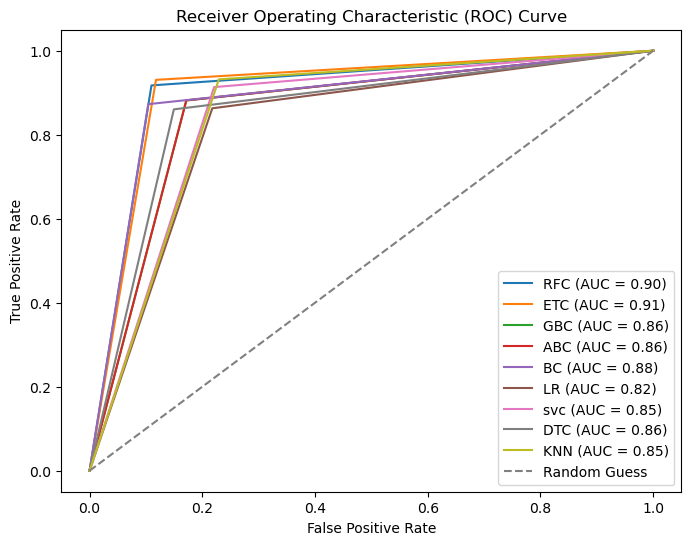

In [53]:
### Plotting AUC and ROC curves for all above classification models.
plt.figure(figsize=(8,6))
for name, model in models:
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test,y_predict)
    print('Threshold of ', name, _)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0,1], [0,1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Observations:
- Considering the highest values of the Area Under the Curve (AUC) as 0.91, Extra Trees Classifier (ETC) is selected.

### Conclusions:
- Considering following parameters of ETC:
  - Highest Accuracy - **90.47%**
  - **Balanced performance in Precision, Recall, F1**
  - Less difference between accuracy score and cross validation score - **-0.0035, indicating good generalization to unseen data.**
  - Highest AUC curve - **0.91**

### Best Model Selction:
- **Considering the holistic evaluation, the Extra Trees Classifier (ETC) is chosen as the best model for further hyperparameter tuning**

### Action plan:
- Hyperparameter tuning on ETC model to optimize its performance further and enhance its predictive capabilities

In [54]:
## Hyperparameter tuning on ETC
from sklearn.model_selection import GridSearchCV

In [55]:
base_regressor = ExtraTreesClassifier() 
param_grid = {'n_estimators': [100],
              'criterion': ["gini", "entropy"],
              'max_depth': [None, 4],
              'min_samples_leaf': [1],
              'max_features': ["sqrt", "log2"]
             }

### Observations:
- Parameters for ETC model has been selected.
- Basis which will select best parameters to tune our selected model.

In [56]:
gridsearch = GridSearchCV(base_regressor, param_grid, cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1], 'n_estimators': [100]})

### Observations:
- Can see feature and target variable are trained on above given parameters to check the best parameters for tuning further ETC model in order to have best performance.

In [57]:
print('Best parameters: ', gridsearch.best_params_)
print('Best score: ', gridsearch.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
Best score:  0.895174860822539


### Observations:
- The output provides the best parameters for further hyperparameter tuning of the model.
- The best score achieved with these parameters is 89.51%.

### Action plan:
- The same parameters will be used in the final ETC model for evaluation.
- Additional tweaking of the parameters will be performed to maximize performance and achieve the best possible results in the final model.

In [72]:
### Training ETC model 1 with above selected parameters
Model_1 = ExtraTreesClassifier(criterion = 'gini', max_depth = None, max_features = 'sqrt',
                               min_samples_leaf = 1, n_estimators = 100)
Model_1.fit(x_train,y_train)

ExtraTreesClassifier(max_features='sqrt')

### Observations:
- Can see ETC model has been trained on above selected best parameters.

### Action plan:
- Let's check the Accuracy score and other metric scores in order to check performance of model basis selected parameters.

In [73]:
y_pred = Model_1.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
pred = Model_1.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred))
print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 90.48%

 
 Confusion Matrix 
 [[5145  694]
 [ 408 5331]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      5839
           1       0.88      0.93      0.91      5739

    accuracy                           0.90     11578
   macro avg       0.91      0.91      0.90     11578
weighted avg       0.91      0.90      0.90     11578



### Observations:
- The latest set of observations indicates a slight increase in the test accuracy of the ETC (Extra Trees Classifier) model after hyperparameter tuning, reaching 90.48% from the previous 90.47%. The results also show consistent and high precision, recall, and F1-score values.

### Action plan:
- Continue tweaking the selected parameters further to check for the best performance of the ETC model.

In [74]:
Model_2 = ExtraTreesClassifier(criterion = 'entropy', max_depth = None, max_features = 'sqrt',
                               min_samples_leaf = 1, n_estimators = 100)
Model_2.fit(x_train,y_train)

y_pred = Model_2.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
pred = Model_2.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred))
print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 90.54%

 
 Confusion Matrix 
 [[5156  683]
 [ 412 5327]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      5839
           1       0.89      0.93      0.91      5739

    accuracy                           0.91     11578
   macro avg       0.91      0.91      0.91     11578
weighted avg       0.91      0.91      0.91     11578



### Observations:
- By changing criterion to 'entropy' (earlier was 'gini'), the test accuracy score slightly increased to 90.54% from 90.48%. However, no changes were found in the train dataset.
- It seems that after changing the criterion to 'entropy', the accuracy score has been slightly reduced.

### Best selected parameters (basis highest Accuracy score):
- criterion = 'entropy'

### Action plan:
- Will tune other parameters as well.

In [75]:
Model_3 = ExtraTreesClassifier(criterion = 'entropy', max_depth = 4, max_features = 'sqrt',
                               min_samples_leaf = 1, n_estimators = 100)
Model_3.fit(x_train,y_train)

y_pred = Model_3.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
pred = Model_3.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred))
print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


---------------Train Result---------------
Accuracy Score: 77.02%

---------------Test Result---------------
Accuracy Score: 77.09%

 
 Confusion Matrix 
 [[3970 1869]
 [ 783 4956]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75      5839
           1       0.73      0.86      0.79      5739

    accuracy                           0.77     11578
   macro avg       0.78      0.77      0.77     11578
weighted avg       0.78      0.77      0.77     11578



### Observations:
- By changing max_depth to 4 (earlier was None), the test accuracy score significantly reduced to 77.09% from 90.54%. However, a similar significant reduction was observed in the train dataset, reducing to 77.02% from 100%.
- It seems that after changing the max_depth to 4, the accuracy score has been significantly reduced for both test and train dataset.

### Best selected parameters (basis highest Accuracy score):
- criterion = 'entropy'
- max_depth = None

### Action plan:
- Will tune other parameters as well.

In [76]:
Model4 = ExtraTreesClassifier(criterion = 'entropy', max_depth = None, max_features = 'log2',
                               min_samples_leaf = 1, n_estimators = 100)
Model4.fit(x_train,y_train)

y_pred = Model4.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
pred = Model4.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred))
print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 90.53%

 
 Confusion Matrix 
 [[5136  703]
 [ 394 5345]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      5839
           1       0.88      0.93      0.91      5739

    accuracy                           0.91     11578
   macro avg       0.91      0.91      0.91     11578
weighted avg       0.91      0.91      0.91     11578



### Observations:
- By changing max_features to log2 (earlier was sqrt), the test accuracy score slightly reduced to 90.53% from 90.54%. However, no changes were found in the train dataset.
- It seems that after changing the max_features to log2, the test accuracy score has been slightly reduced for test dataset.

### Best selected parameters (basis highest Accuracy score):
- criterion = 'entropy'
- max_depth = None
- max_features = 'sqrt'

### Action plan:
- Will tune final model considering final selected parameters:
  - criterion = 'entropy'
  - max_depth = None
  - max_features = 'sqrt'
  - min_samples_leaf = 1
  - n_estimators = 100

In [79]:
Final_ClassModel = ExtraTreesClassifier(criterion = 'entropy', max_depth = None, max_features = 'sqrt',
                               min_samples_leaf = 1, n_estimators = 100)
Final_ClassModel.fit(x_train,y_train)

y_pred = Final_ClassModel.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
pred = Final_ClassModel.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred))
print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 90.68%

 
 Confusion Matrix 
 [[5155  684]
 [ 395 5344]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      5839
           1       0.89      0.93      0.91      5739

    accuracy                           0.91     11578
   macro avg       0.91      0.91      0.91     11578
weighted avg       0.91      0.91      0.91     11578



### Observations:
- With selected parameters final model accuracy score improved to **90.68%** from 90.47% (before hyperparameter tuning).- 

### Conclusion on selecting ETC (with selected hypertuning parameter) as the final Model for further production, due to following reasons:
- The model achieves a very good accuracy score, indicating its ability to correctly classify instances.
- Both precision and recall values are well-balanced for both classes, suggesting that the model is making accurate positive predictions while minimizing false positives and false negatives.
- The model generalizes well to unseen data, as evidenced by its performance on the test set.

### Action plan:
- Will save the final Classification model as **ETC** with Accuracy as **90.68%**

### Saving the final Classification model

In [80]:
import pickle
pickle.dump(Final_ClassModel, open('Census Income','wb'))

### Observations:
- Can see Final Model has been saved with the help of Pickle method.

In [81]:
## Do the prediction
loaded_model = pickle.load(open('Census Income','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predicted
df['Original'] = original
print(f"Accuracy Score: {accuracy_score(y_test, predicted) * 100:.2f}%")
print('Comparison of values between original and predicted values: ', '\n', df)

Accuracy Score: 90.68%
Comparison of values between original and predicted values:  
        Predicted  Original
0              1         1
1              1         1
2              0         0
3              1         1
4              0         0
...          ...       ...
11573          1         0
11574          1         1
11575          0         0
11576          1         1
11577          0         1

[11578 rows x 2 columns]


### Observations:
- The accuracy score of the **Final Binary Classification ETC model is reported as 90.68%.**
- The comparison between predicted and original values is provided in the table. The "Predicted" column represents the predicted values, and the "Original" column represents the actual values.
- This model is designed to predict whether a person's income is over **Dollar50K**, with the binary classification denoted by **0 (<= Dollar50K) and 1 (> Dollar50K).**